# Term Weight Modelling

In [1]:
import wikipedia
import nltk
from nltk.corpus import stopwords
import random
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.stem.porter import PorterStemmer
from collections import defaultdict
import math
import seaborn as sns
import matplotlib.pyplot as plt

## Reading 100 articles (from wikipedia)

In [2]:
article=pd.read_csv('articles.csv')
article

,0
0,"Python is an interpreted, high-level, general-..."
1,The programming language Python was conceived ...
2,The Rafael Python is a family of air-to-air mi...
3,"In computing, a shebang is the character seque..."
4,Setuptools is a package development process li...
...,...
95,Computer vision is an interdisciplinary scient...
96,A computer lab is a space which provides compu...
97,"A laptop (also laptop computer), is a small, p..."
98,A desktop computer is a personal computer desi...


In [3]:
data = article['0']
data[0]

'Python is an interpreted, high-level, general-purpose programming language. Created by Guido van Rossum and first released in 1991, Python\'s design philosophy emphasizes code readability with its notable use of significant whitespace. Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly, procedural), object-oriented, and functional programming. Python is often described as a "batteries included" language due to its comprehensive standard library.Python was conceived in the late 1980s as a successor to the ABC language. Python 2.0, released in 2000, introduced features like list comprehensions and a garbage collection system with reference counting.\nPython 3.0, released in 2008, was a major revision of the language that is not completely backward-compatible, and much Pytho

## Cleaning the corpus

In [4]:
def clean(data):
    porter=PorterStemmer()
    for i in range(len(data)):
        data[i]=word_tokenize(data[i])
        data[i]=[word.replace('.','') for word in data[i]]
        data[i]=[word.replace('-','') for word in data[i]]
        data[i]=[word for word in data[i] if word.isalpha()]
        data[i]=[word.lower() for word in data[i]]
        data[i]=[word for word in data[i] if not word in stopwords.words("english")]
        data[i]=[porter.stem(word) for word in data[i]]
    return data
    

In [5]:
data=clean(data)
N=len(data)

In [6]:
for i in range(N):
    data[i]=np.array(data[i])

In [7]:
from collections import Counter
word_count=Counter(data[0])
word_count.most_common(10)

[('python', 196),
 ('use', 71),
 ('languag', 64),
 ('program', 43),
 ('releas', 29),
 ('c', 29),
 ('statement', 28),
 ('code', 27),
 ('type', 27),
 ('includ', 27)]

In [8]:
Vocabulary=defaultdict(lambda:[0])
for i in range(N):
    for word in data[i]:
        Vocabulary[word][0]+=1
print('Size of Vocabulary is '+str(len(Vocabulary)))      

Size of Vocabulary is 17384


In [9]:
c=0
term_id=[]
for i in Vocabulary:
    term_id.append(c)
    c+=1
    print(i)

python
interpret
highlevel
generalpurpos
program
languag
creat
guido
van
rossum
first
releas
design
philosophi
emphas
code
readabl
notabl
use
signific
whitespac
construct
objectori
approach
aim
help
programm
write
clear
logic
small
largescal
projectspython
dynam
type
garbagecollect
support
multipl
paradigm
includ
structur
particularli
procedur
function
often
describ
batteri
due
comprehens
standard
librarypython
conceiv
late
successor
abc
introduc
featur
like
list
garbag
collect
system
refer
count
major
revis
complet
backwardcompat
much
run
unmodifi
offici
discontinu
plan
last
therefor
secur
patch
improv
endoflif
later
avail
mani
oper
global
commun
develop
maintain
cpython
free
opensourc
implement
nonprofit
organ
softwar
foundat
manag
direct
resourc
histori
centrum
wiskund
informatica
cwi
netherland
inspir
setl
capabl
except
handl
interfac
amoeba
began
decemb
shoulder
sole
respons
project
lead
juli
announc
perman
vacat
benevol
dictat
life
titl
bestow
upon
reflect
longterm
commit
chief
d

palladium
twelv
newer
stephen
fri
lauri
puppet
spit
pioneer
brief
pursu
breakup
wanda
bandit
jabberwocki
cowrot
adventur
munchausen
yellowbeard
cowritten
marti
feldmanpalin
rip
yarn
pilot
nonspeak
golden
gordon
erik
vike
adapt
novel
wind
willow
ratti
lawyer
sun
coogan
moleclees
prolif
career
dozen
cheer
assist
bond
grace
directtovideo
sitcom
fawlti
tower
wife
conni
booth
bfi
homer
simpson
charactersidl
rutland
weekend
rutl
mockumentari
cash
nun
robbi
coltran
crackerbox
palac
bright
chart
reviv
simon
mayo
spamalot
financi
prerecord
god
enorm
broadway
la
vega
oratorio
premier
luminato
commiss
sang
baritoneish
reunion
rumour
surviv
gather
wild
ride
livemonti
inaugur
elton
satellit
purport
ash
reunit
robert
klein
eddi
izzard
commemor
devot
interspers
eventth
annoy
refus
anniversari
face
tom
hank
publicis
dvd
imposs
busy
bad
spoof
deliber
unconvinc
fashion
wo
lennon
reveal
disput
sequel
mediocr
wish
amongst
absenc
manlik
anchor
board
almost
certainli
invalu
moviea
nonperform
chicago
nomin
n

prototyp
precisionengin
tighter
cad
strateg
toolfailur
realis
costli
timefor
transmit
muscl
electrod
chest
stimul
infect
myocardium
thoracotomi
isotopepow
lifespan
proposit
expedit
developmenton
clarifi
insulin
deepbrain
engend
privaci
glitch
suscept
wirelessli
antenna
shut
reprogram
lethal
shock
radcliff
glucos
downplay
readili
tap
pin
dosag
anand
raghunathan
worn
downsid
strain
price
maisel
sabotag
inflict
bodycoupl
wave
internetconnect
devicessimilar
tier
nist
cybersecurityrel
armamentarium
mri
pet
ct
lasik
ventil
heartlung
ecmo
dialysi
ecg
eeg
urin
dissolv
gase
diabet
mellitu
passiv
cpm
machinesth
identif
udi
gmdn
endors
imdrf
technician
bmet
donat
perspect
lowresourc
lifesav
wellintent
strategi
chariti
middleincom
lmic
subsaharan
anaesthesia
shortcom
advocaci
minnesota
strathclyd
simd
flinder
mdri
michigan
sop
iit
bombay
betic
notif
pma
ec
catalogu
frequenc
statesfda
tissu
widest
radiographi
magnet
reson
endoscopi
elastographi
tactil
thermographi
photographi
positron
emiss
tomogra

powerpl
injectiondiesel
intakeair
gmbh
wagon
commonrail
kilometr
refuel
nonelectrifi
cargohaul
electrif
dmu
underfloor
mate
deutsch
reichsbahn
onedigit
dieselelectricth
rigid
db
bergey
unman
durabl
aopa
nonroad
refriger
intermitt
various
ceram
titanium
altogeth
withstand
converg
hub
étienn
nicolau
sixstrok
firearm
sodium
energydens
internalcombustionengin
icev
bioethanol
methanol
barber
mead
nicéphor
pyréolophor
saôn
françoi
isaac
conced
piedmont
jean
gasfir
liquidfuel
gottlieb
daimler
maybach
fourcycl
goddard
heinkel
ingenium
mover
hull
transom
land
powertoweight
airplan
helicopt
airlin
aerial
lawnmow
trimmer
leafblow
snowmobil
ski
outboard
mope
enginebi
infrequ
ductfan
turboprop
unduct
pitch
aluminium
row
watercool
fin
protrud
hone
cylindr
concav
deflector
reinforc
gudgeon
circumfer
leak
crankcas
blowbi
bolt
stud
occlus
gasket
desmodrom
rocker
pushrod
sump
caviti
bulkhead
deck
offset
crankpin
circular
tailpip
bdc
furthest
lobe
irrevers
leftov
blowdown
chargewhil
expuls
sae
promptli
p

célèbre
materialssci
gretchen
kalonji
probablecaus
umass
jen
tenurein
africanamerican
sherley
reignit
racism
protract
hungerstrik
twentyon
facultymemb
wield
alumnu
elleri
hale
olin
needham
wrighton
alic
gast
lehigh
suh
nampyo
kaist
birgeneau
maeda
risd
mcnutt
souza
brigg
cochair
moniz
obama
alumna
sheila
widnal
secondlargest
worklif
scholarsalumni
bernank
olver
massi
christina
romer
ali
akbar
salehi
netanyahu
virgilio
barco
varga
mario
draghi
raghuram
rajan
miliband
papademo
kofi
annan
iraqi
deputi
ahm
chalabi
yahya
muhaimin
jordanian
khale
toukan
fenc
johan
harmenberg
mcdonnel
apotex
rockwel
genentech
campbel
guardian
silicon
trillion
gdp
worldpromin
jersey
lahor
renssela
tecnológico
monterrey
purdu
quaideazam
berkle
berk
miteduc
lunar
aldrin
qian
xuesen
prc
programnot
nonscientif
loft
sculptor
chester
scholz
itn
columnist
krugman
cass
gilbert
pritzker
prizewin
bunshaft
bookstor
glossari
wikisourc
encyclopedia
americana
swain
fillmor
fortun
ecommerc
fiscal
nanotech
supramolecular
macr

candela
gamut
srgb
adobergb
viewabl
diagon
subpixel
luminos
impercept
envelop
eighteeninch
sq
larges
computersin
nonwidescreen
topend
retina
macbook
chromat
srgbencod
widegamut
exif
powersav
videoinput
dim
codec
glossi
antiglar
antireflect
ostendo
carlsbad
autostereoscop
headgear
ultrawid
vesa
swivel
portrait
fdmi
fixeda
flang
stowablea
stowabl
slid
kvm
thrubolt
weld
watertight
openfram
spiegel
monitorvan
eck
phreak
wim
multimonitor
docomput
highdimension
elicit
disentangl
multidimension
subdomain
nonpolyhedr
polyhedr
estimationth
scalespac
markov
multiview
eigenfac
imagebas
morph
panoram
lightfield
renderingrec
featurebas
neurobiolog
neuron
stimuli
visionrel
learningbas
strand
fruit
onevari
twovari
multivari
pixelwis
geometr
visionbas
emphasis
dataphotogrammetri
stereophotogrammetri
computervis
preprogram
computerhuman
topograph
arteriosclerosi
malign
battlefield
submers
landbas
computervisionbas
slam
recon
cnsa
undul
dataoth
matchmov
blippar
goggl
likethat
handwritten
interpretationc

## Term Frequency calculation (TF)

### Calculating frequency of terms in each document i.e. $f_{ij}$

In [10]:
fij=[[] for i in range(N)]
for i in range(N):
    for j in Vocabulary:
        fij[i].append(np.count_nonzero(data[i]==j))

In [11]:
def maxi(fij,j):
    max_val=0;
    for i in range(len(fij)):
        if(fij[i][j]>max_val):
            max_val=fij[i][j]
    return max_val
    

### Calculating TF with the help of $f_{ij}$

In [12]:
tfi=[[] for i in range(len(data))]
tf_dn=[[] for i in range(len(data))]
for i in range(len(tfi)):
    for j in range(len(fij[0])):
        if fij[i][j]==0:
            tfi[i].append(0)
        else:
            tfi[i].append(math.log2(fij[i][j])+1)
        temp=0.4+(0.6*(fij[i][j]/maxi(fij,j)))
        tf_dn[i].append(temp)

tfi - tf using log normalization ; $tf_{ij}$=1+$log_2$($f_{ij}$)  <sp> if $f_{ij}$>0 , else 0<br>
tf_dn - tf using double normalization K ; $tf_{ij}$=0.4+0.6$\frac{f_{ij}}{max_if_{ij}}$

## Inverse Document Frequency (IDF)

In [13]:
ni=[]
for i in Vocabulary:
    ni.append(0)
    for j in range(len(data)):
        if np.count_nonzero(data[j]==i)>0:
            ni[-1]+=1

ni - number of doc containing term $k_{i}$

In [14]:
ni

[28,
 26,
 10,
 11,
 70,
 42,
 74,
 6,
 15,
 6,
 70,
 56,
 80,
 15,
 18,
 54,
 9,
 39,
 98,
 39,
 5,
 34,
 12,
 41,
 34,
 48,
 36,
 30,
 29,
 26,
 51,
 9,
 2,
 21,
 60,
 2,
 66,
 53,
 16,
 92,
 42,
 32,
 28,
 57,
 73,
 48,
 16,
 59,
 17,
 65,
 2,
 9,
 42,
 13,
 8,
 48,
 54,
 71,
 56,
 4,
 39,
 83,
 100,
 17,
 63,
 13,
 55,
 4,
 63,
 59,
 4,
 38,
 9,
 38,
 40,
 38,
 31,
 11,
 47,
 4,
 55,
 69,
 79,
 73,
 34,
 52,
 82,
 45,
 3,
 40,
 15,
 59,
 10,
 47,
 58,
 30,
 64,
 55,
 36,
 69,
 3,
 3,
 4,
 3,
 9,
 18,
 3,
 43,
 35,
 43,
 45,
 3,
 37,
 22,
 4,
 13,
 43,
 49,
 49,
 29,
 25,
 17,
 3,
 4,
 5,
 39,
 24,
 3,
 29,
 25,
 13,
 6,
 11,
 7,
 42,
 7,
 23,
 2,
 3,
 18,
 25,
 48,
 33,
 9,
 2,
 3,
 3,
 2,
 3,
 3,
 4,
 5,
 2,
 2,
 22,
 77,
 3,
 4,
 2,
 3,
 54,
 49,
 42,
 20,
 36,
 14,
 26,
 30,
 56,
 69,
 2,
 44,
 63,
 32,
 57,
 58,
 32,
 2,
 3,
 29,
 2,
 3,
 2,
 9,
 57,
 48,
 48,
 20,
 2,
 49,
 36,
 96,
 66,
 18,
 10,
 23,
 34,
 57,
 9,
 51,
 18,
 16,
 60,
 15,
 84,
 26,
 29,
 74,
 37,
 3,
 3,
 40

### Different variants of idf using $n_i$

In [15]:
N=len(data)
idf=[]
idf_ifs=[]
idf_pif=[]
for i in range(len(Vocabulary)):
    idf.append(math.log2(N/ni[i]))
    idf_ifs.append(math.log2(1+(N/ni[i])))
    if(N-ni[i]==0):
        idf_pif.append(0)
    else:
        idf_pif.append(math.log2((N-ni[i])/ni[i]))

idf - idf using inverse frequency $idf_i$=$log_2$($\frac{N}{n_i}$)<br>
idf_ifs - idf using inverse frequency smooth $idf_i$=$log_2$(1+$\frac{N}{n_i}$)<br>
idf_pif - idf using probabilistic inv frequency $idf_i$=$log_2$($\frac{N-n_i}{n_i}$)

In [16]:
idf_pif

[1.3625700793847084,
 1.5090136474878577,
 3.169925001442312,
 3.0163018123291008,
 -1.222392421336448,
 0.46566357234881184,
 -1.5090136474878575,
 3.969626350956481,
 2.5025003405291835,
 3.969626350956481,
 -1.222392421336448,
 -0.3479233034203069,
 -2.0,
 2.5025003405291835,
 2.187627003175771,
 -0.23132554610645564,
 3.3378696387563838,
 0.645335118700638,
 -5.614709844115208,
 0.645335118700638,
 4.247927513443585,
 0.9569312781081141,
 2.8744691179161412,
 0.5250910447437575,
 0.9569312781081141,
 0.11547721741993588,
 0.8300749985576876,
 1.222392421336448,
 1.29176612437711,
 1.5090136474878577,
 -0.05771549785628733,
 3.3378696387563838,
 5.614709844115208,
 1.9114633253983426,
 -0.5849625007211563,
 5.614709844115208,
 -0.9569312781081141,
 -0.17333160288556176,
 2.3923174227787602,
 -3.523561956057013,
 0.46566357234881184,
 1.0874628412503393,
 1.3625700793847084,
 -0.4066252594626437,
 -1.434937056716549,
 0.11547721741993588,
 2.3923174227787602,
 -0.5250910447437575,
 2

In [17]:
term=[]
for i in Vocabulary:
    term.append(i)

In [18]:
term

['python',
 'interpret',
 'highlevel',
 'generalpurpos',
 'program',
 'languag',
 'creat',
 'guido',
 'van',
 'rossum',
 'first',
 'releas',
 'design',
 'philosophi',
 'emphas',
 'code',
 'readabl',
 'notabl',
 'use',
 'signific',
 'whitespac',
 'construct',
 'objectori',
 'approach',
 'aim',
 'help',
 'programm',
 'write',
 'clear',
 'logic',
 'small',
 'largescal',
 'projectspython',
 'dynam',
 'type',
 'garbagecollect',
 'support',
 'multipl',
 'paradigm',
 'includ',
 'structur',
 'particularli',
 'procedur',
 'function',
 'often',
 'describ',
 'batteri',
 'due',
 'comprehens',
 'standard',
 'librarypython',
 'conceiv',
 'late',
 'successor',
 'abc',
 'introduc',
 'featur',
 'like',
 'list',
 'garbag',
 'collect',
 'system',
 'refer',
 'count',
 'major',
 'revis',
 'complet',
 'backwardcompat',
 'much',
 'run',
 'unmodifi',
 'offici',
 'discontinu',
 'plan',
 'last',
 'therefor',
 'secur',
 'patch',
 'improv',
 'endoflif',
 'later',
 'avail',
 'mani',
 'oper',
 'global',
 'commun',


In [19]:
i=0
voc={}
for j in range(len(term)):
    voc[term[j]]=i
    i+=1

## TF-IDF calculation   $w_{i,j}$ = $tf_{ij}xidf_i$

In [20]:
doc=[[] for i in range(N)]
doc_ln_ifs=[[] for i in range(N)]
doc_ln_pif=[[] for i in range(N)]
doc_dn_ifs=[[] for i in range(N)]
doc_dn_pif=[[] for i in range(N)]
for i in range(N):
    for j in range(len(term)):
        if tfi[i][j]==0:
            doc[i].append(0)
        else:
            doc[i].append(tfi[i][j]*idf[j])
        doc_ln_ifs[i].append(tfi[i][j]*idf_ifs[j])
        doc_ln_pif[i].append(tfi[i][j]*idf_pif[j])
        doc_dn_ifs[i].append(tf_dn[i][j]*idf_ifs[j])
        doc_dn_pif[i].append(tf_dn[i][j]*idf_pif[j])

doc : $w_{i,j}$ using tf(log normalization) and idf(inverse frequency) <br>
doc_ln_ifs : $w_{i,j}$ using tf(log normalization) and idf(inverse frequency smooth)<br>
doc_ln_pif : $w_{i,j}$ using tf(log normalization) and idf(probabilistic inverse frequency)<br>
doc_dn_ifs : $w_{i,j}$ using tf(double normalization K) and idf(inverse frequency smooth)<br>
doc_dn_pif : $w_{i,j}$ using tf(double normalization K) and idf(probabilistic inverse frequency)

In [21]:
d={'term':term}
d_ln_ifs={'term':term}
d_ln_pif={'term':term}
d_dn_ifs={'term':term}
d_dn_pif={'term':term}
for i in range(N):
    d['doc'+str(i)]=doc[i]
    d_ln_ifs['doc'+str(i)]=doc_ln_ifs[i]
    d_ln_pif['doc'+str(i)]=doc_ln_pif[i]
    d_dn_ifs['doc'+str(i)]=doc_dn_ifs[i]
    d_dn_pif['doc'+str(i)]=doc_dn_pif[i]

In [22]:
VSM=pd.DataFrame(d)
VSM_ln_ifs=pd.DataFrame(d_ln_ifs)
VSM_ln_pif=pd.DataFrame(d_ln_pif)
VSM_dn_ifs=pd.DataFrame(d_dn_ifs)
VSM_dn_pif=pd.DataFrame(d_dn_pif)

In [23]:
VSM

,term,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,...,doc90,doc91,doc92,doc93,doc94,doc95,doc96,doc97,doc98,doc99
0,python,15.820926,13.479644,7.346005,3.673003,9.011511,1.836501,4.747287,0.0,7.937226,...,0.000000,0.000000,0.00000,1.836501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,interpret,8.910492,0.000000,0.000000,12.616374,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.943416,0.00000,5.830249,0.000000,5.830249,0.000000,0.000000,0.000000,0.000000
2,highlevel,6.643856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,6.643856,0.000000,0.00000,0.000000,0.000000,11.035206,0.000000,0.000000,0.000000,0.000000
3,generalpurpos,3.184425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,11.416043,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,program,3.306783,2.145732,0.514573,2.418720,0.514573,1.709375,0.000000,0.0,0.000000,...,2.524954,3.039527,2.41872,3.039527,1.330152,0.514573,0.514573,1.029146,0.514573,2.058293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,graphicart,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.643856
17380,digitalanim,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.643856
17381,saver,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.287712
17382,deviceappl,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.643856


Vector Space Model (VSM) using tf(log normalization) and idf(inverse frequency)

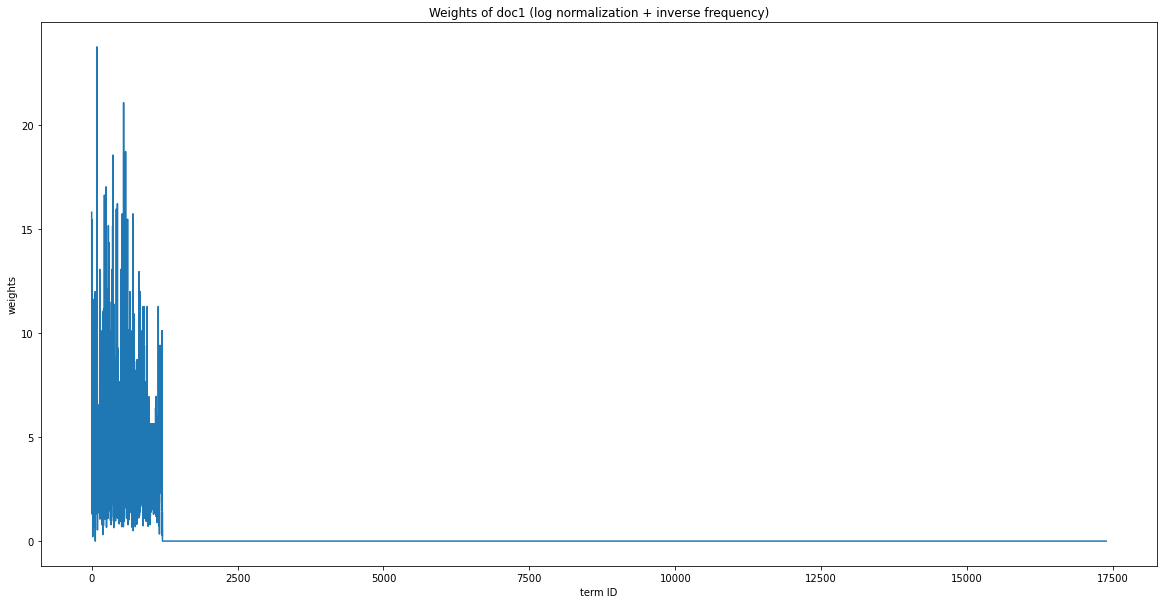

In [24]:
plt.figure(figsize=(20,10))
plt.plot(VSM.index,VSM['doc0'])
plt.xlabel('term ID')
plt.ylabel('weights')
plt.title('Weights of doc1 (log normalization + inverse frequency)')
plt.show()

In [25]:
VSM_ln_ifs

,term,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,...,doc90,doc91,doc92,doc93,doc94,doc95,doc96,doc97,doc98,doc99
0,python,18.889001,16.093686,8.770580,4.385290,10.759070,2.192645,5.667905,0.0,9.476454,...,0.000000,0.000000,0.00000,2.192645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,interpret,10.439227,0.000000,0.000000,14.780912,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,2.276840,0.00000,6.830521,0.000000,6.830521,0.000000,0.000000,0.000000,0.000000
2,highlevel,6.918863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,6.918863,0.000000,0.00000,0.000000,0.000000,11.491983,0.000000,0.000000,0.000000,0.000000
3,generalpurpos,3.334984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,11.955793,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,program,8.226312,5.337954,1.280108,6.017070,1.280108,4.252426,0.000000,0.0,0.000000,...,6.281350,7.561457,6.01707,7.561457,3.309031,1.280108,1.280108,2.560216,1.280108,5.120432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,graphicart,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.658211
17380,digitalanim,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.658211
17381,saver,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.316423
17382,deviceappl,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.658211


VSM_ln_ifs : VSM using tf(log normalization) and idf(inverse frequency smooth)

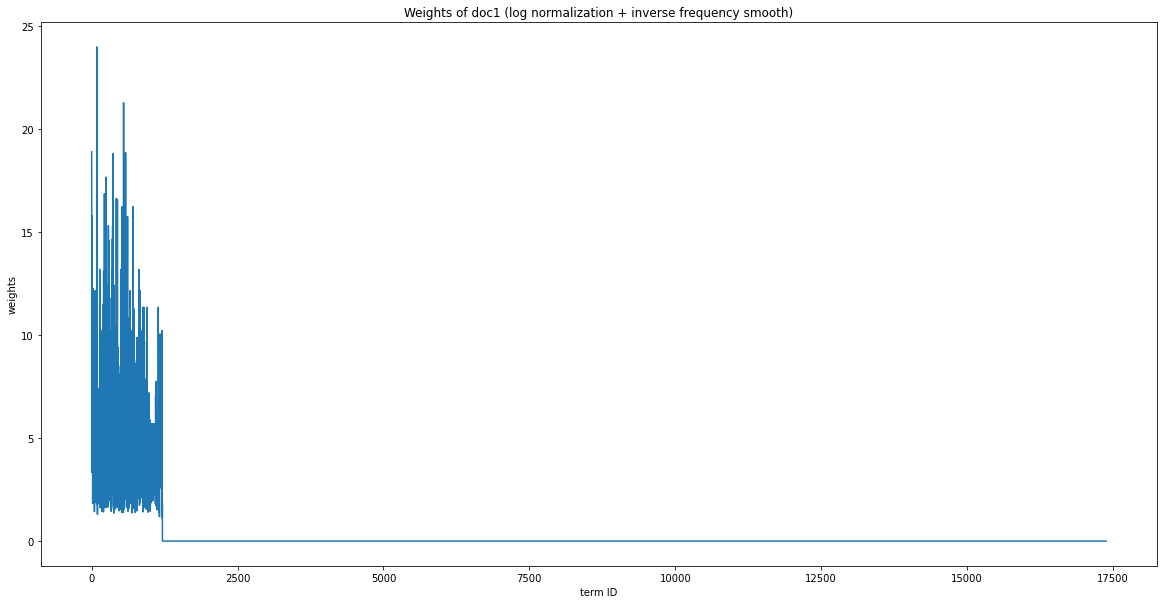

In [26]:
plt.figure(figsize=(20,10))
plt.plot(VSM_ln_ifs.index,VSM_ln_ifs['doc0'])
plt.xlabel('term ID')
plt.ylabel('weights')
plt.title('Weights of doc1 (log normalization + inverse frequency smooth)')
plt.show()

In [27]:
VSM_ln_pif

,term,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,...,doc90,doc91,doc92,doc93,doc94,doc95,doc96,doc97,doc98,doc99
0,python,11.738146,10.001060,5.450280,2.725140,6.685982,1.36257,3.522193,0.0,5.88893,...,0.000000,0.000000,0.000000,1.362570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,interpret,6.918771,0.000000,0.000000,9.796295,0.000000,0.00000,0.000000,0.0,0.00000,...,0.000000,1.509014,0.000000,4.527041,0.000000,4.527041,0.000000,0.000000,0.000000,0.000000
2,highlevel,6.339850,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,...,6.339850,0.000000,0.000000,0.000000,0.000000,10.530263,0.000000,0.000000,0.000000,0.000000
3,generalpurpos,3.016302,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,...,0.000000,10.813329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,program,-7.855417,-5.097285,-1.222392,-5.745782,-1.222392,-4.06070,-0.000000,-0.0,-0.00000,...,-5.998146,-7.220538,-5.745782,-7.220538,-3.159839,-1.222392,-1.222392,-2.444785,-1.222392,-4.889570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,graphicart,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.629357
17380,digitalanim,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.629357
17381,saver,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.258713
17382,deviceappl,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.629357


VSM_ln_pif : VSM using tf(log normalization) and idf(probabilistic inverse frequency)

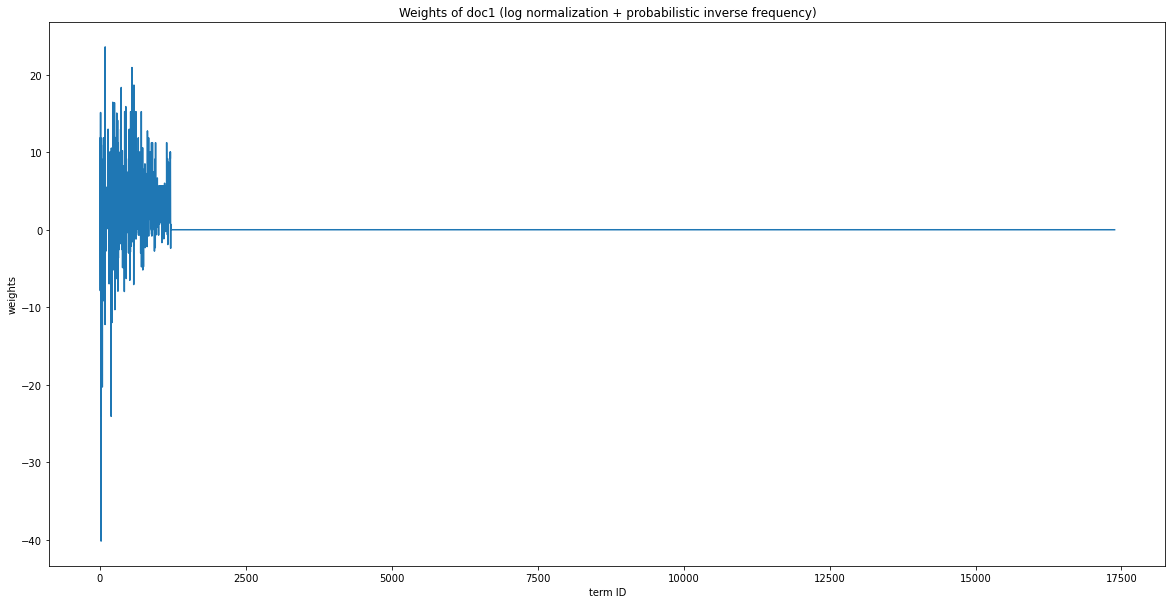

In [28]:
plt.figure(figsize=(20,10))
plt.plot(VSM_ln_pif.index,VSM_ln_pif['doc0'])
plt.xlabel('term ID')
plt.ylabel('weights')
plt.title('Weights of doc1 (log normalization + probabilistic inverse frequency)')
plt.show()

In [29]:
VSM_dn_ifs

,term,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,...,doc90,doc91,doc92,doc93,doc94,doc95,doc96,doc97,doc98,doc99
0,python,1.754116,1.239516,0.912856,0.886008,0.944180,0.881533,0.890482,0.877058,0.921806,...,0.877058,0.877058,0.877058,0.881533,0.877058,0.877058,0.877058,0.877058,0.877058,0.877058
1,interpret,1.275031,0.910736,0.910736,2.276840,0.910736,0.910736,0.910736,0.910736,0.910736,...,0.910736,0.941094,0.910736,1.032168,0.910736,1.032168,0.910736,0.910736,0.910736,0.910736
2,highlevel,2.214036,1.383773,1.383773,1.383773,1.383773,1.383773,1.383773,1.383773,1.383773,...,2.214036,1.383773,1.383773,1.383773,1.383773,3.459432,1.383773,1.383773,1.383773,1.383773
3,generalpurpos,1.667492,1.333994,1.333994,1.333994,1.333994,1.333994,1.333994,1.333994,1.333994,...,1.333994,3.334984,1.333994,1.333994,1.333994,1.333994,1.333994,1.333994,1.333994,1.333994
4,program,0.863392,0.585581,0.520214,0.618265,0.520214,0.552898,0.512043,0.512043,0.512043,...,0.634607,0.757170,0.618265,0.757170,0.536556,0.520214,0.520214,0.528385,0.520214,0.577410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,graphicart,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,...,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,6.658211
17380,digitalanim,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,...,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,6.658211
17381,saver,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,...,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,6.658211
17382,deviceappl,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,...,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,2.663285,6.658211


VSM_dn_ifs : VSM using tf(double normalization K) and idf(inverse frequency smooth)

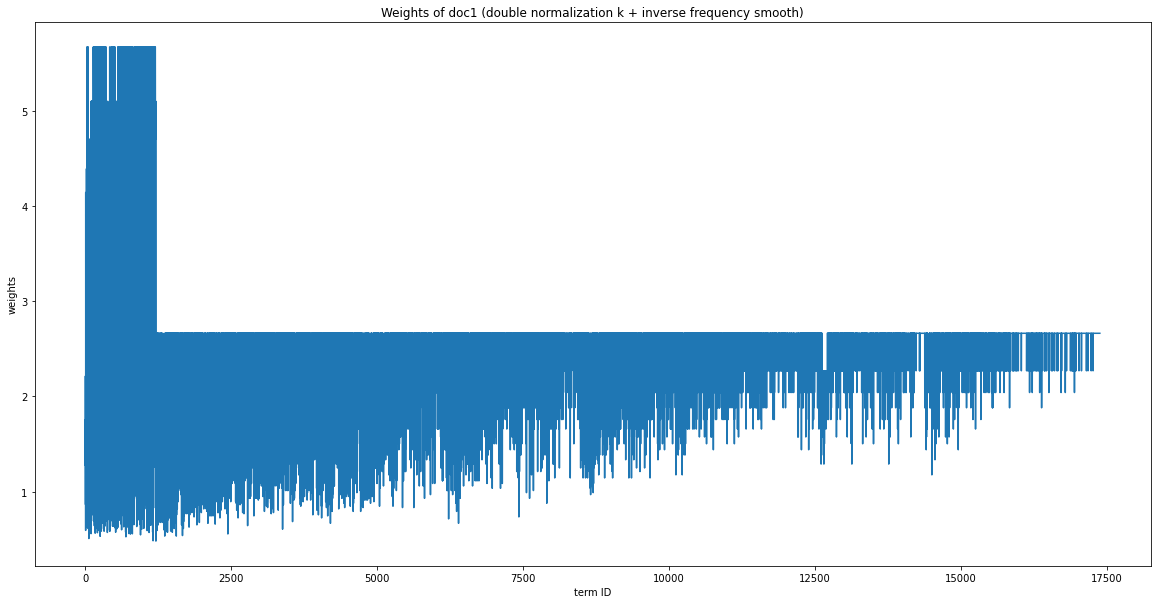

In [47]:
plt.figure(figsize=(20,10))
plt.plot(VSM_dn_ifs.index,VSM_dn_ifs['doc0'])
plt.xlabel('term ID')
plt.ylabel('weights')
plt.title('Weights of doc1 (double normalization k + inverse frequency smooth)')
plt.show()

In [31]:
VSM_dn_pif

,term,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,...,doc90,doc91,doc92,doc93,doc94,doc95,doc96,doc97,doc98,doc99
0,python,1.090056,0.770269,0.567274,0.550590,0.586739,0.547809,0.553370,0.545028,0.572836,...,0.545028,0.545028,0.545028,0.547809,0.545028,0.545028,0.545028,0.545028,0.545028,0.545028
1,interpret,0.845048,0.603605,0.603605,1.509014,0.603605,0.603605,0.603605,0.603605,0.603605,...,0.603605,0.623726,0.603605,0.684086,0.603605,0.684086,0.603605,0.603605,0.603605,0.603605
2,highlevel,2.028752,1.267970,1.267970,1.267970,1.267970,1.267970,1.267970,1.267970,1.267970,...,2.028752,1.267970,1.267970,1.267970,1.267970,3.169925,1.267970,1.267970,1.267970,1.267970
3,generalpurpos,1.508151,1.206521,1.206521,1.206521,1.206521,1.206521,1.206521,1.206521,1.206521,...,1.206521,3.016302,1.206521,1.206521,1.206521,1.206521,1.206521,1.206521,1.206521,1.206521
4,program,-0.824465,-0.559180,-0.496759,-0.590390,-0.496759,-0.527969,-0.488957,-0.488957,-0.488957,...,-0.605995,-0.723032,-0.590390,-0.723032,-0.512364,-0.496759,-0.496759,-0.504562,-0.496759,-0.551377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,graphicart,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,...,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,6.629357
17380,digitalanim,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,...,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,6.629357
17381,saver,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,...,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,6.629357
17382,deviceappl,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,...,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,2.651743,6.629357


VSM_dn_pif : VSM using tf(double normalization K) and idf(probabilistic inverse frequency)

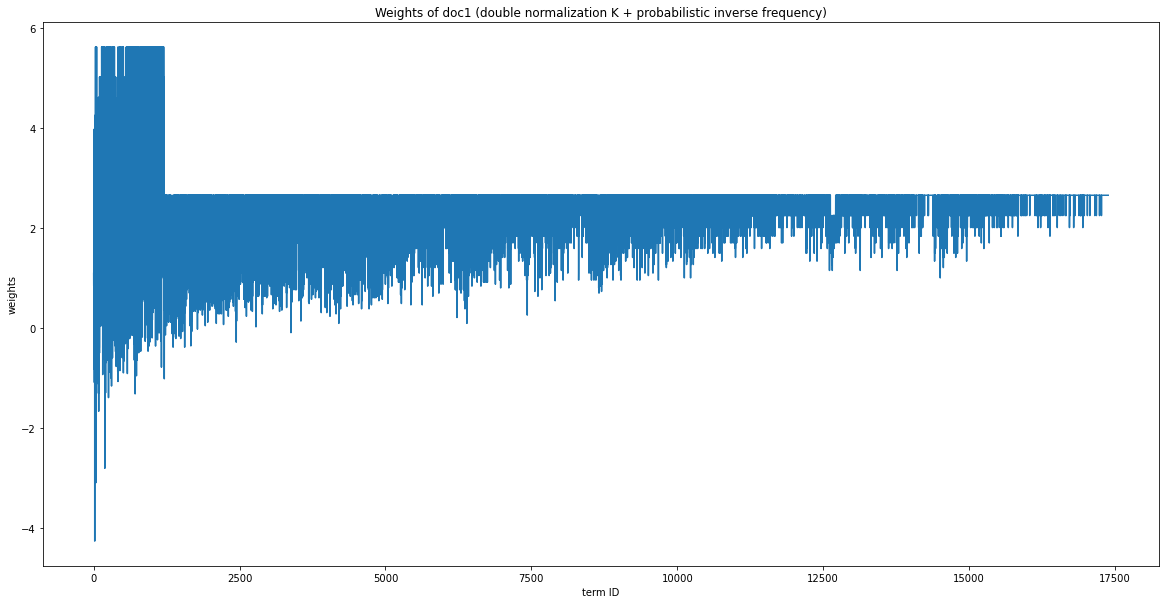

In [48]:
plt.figure(figsize=(20,10))
plt.plot(VSM_dn_pif.index,VSM_dn_pif['doc0'])
plt.xlabel('term ID')
plt.ylabel('weights')
plt.title('Weights of doc1 (double normalization K + probabilistic inverse frequency)')
plt.show()

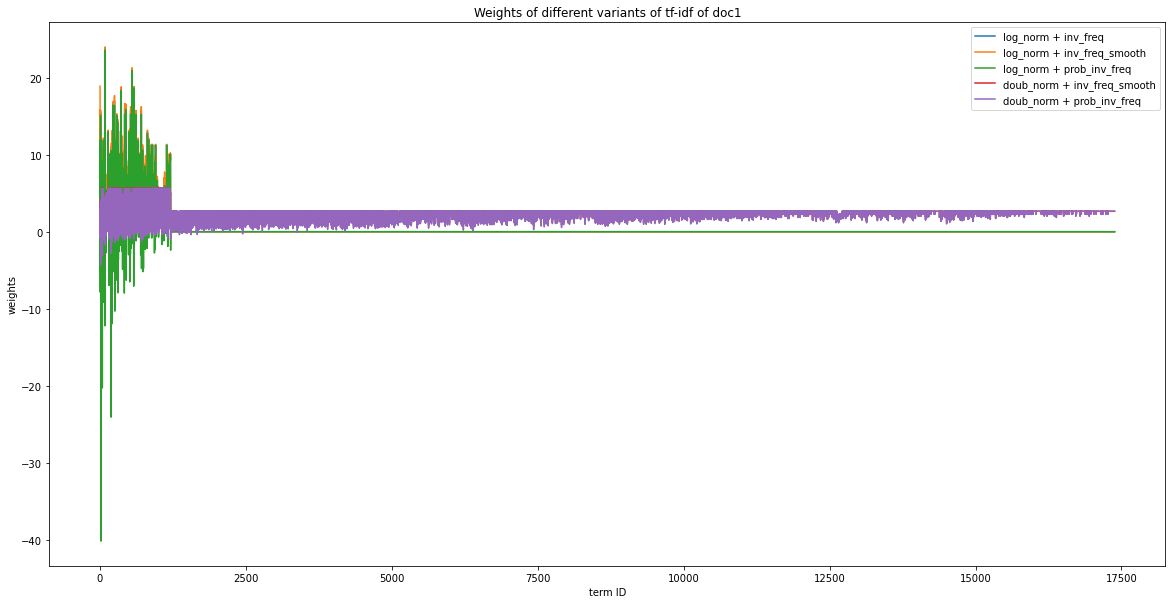

In [33]:
plt.figure(figsize=(20,10))
plt.plot(VSM.index,VSM['doc0'],label='log_norm + inv_freq')
plt.plot(VSM_ln_ifs.index,VSM_ln_ifs['doc0'],label='log_norm + inv_freq_smooth')
plt.plot(VSM_ln_pif.index,VSM_ln_pif['doc0'],label='log_norm + prob_inv_freq')
plt.plot(VSM_dn_ifs.index,VSM_dn_ifs['doc0'],label='doub_norm + inv_freq_smooth')
plt.plot(VSM_dn_pif.index,VSM_dn_pif['doc0'],label='doub_norm + prob_inv_freq')
plt.xlabel('term ID')
plt.ylabel('weights')
plt.title('Weights of different variants of tf-idf of doc1')
plt.legend()
plt.show()

Weights calculated using probabilistic inv-frequency(idf) has few negative values

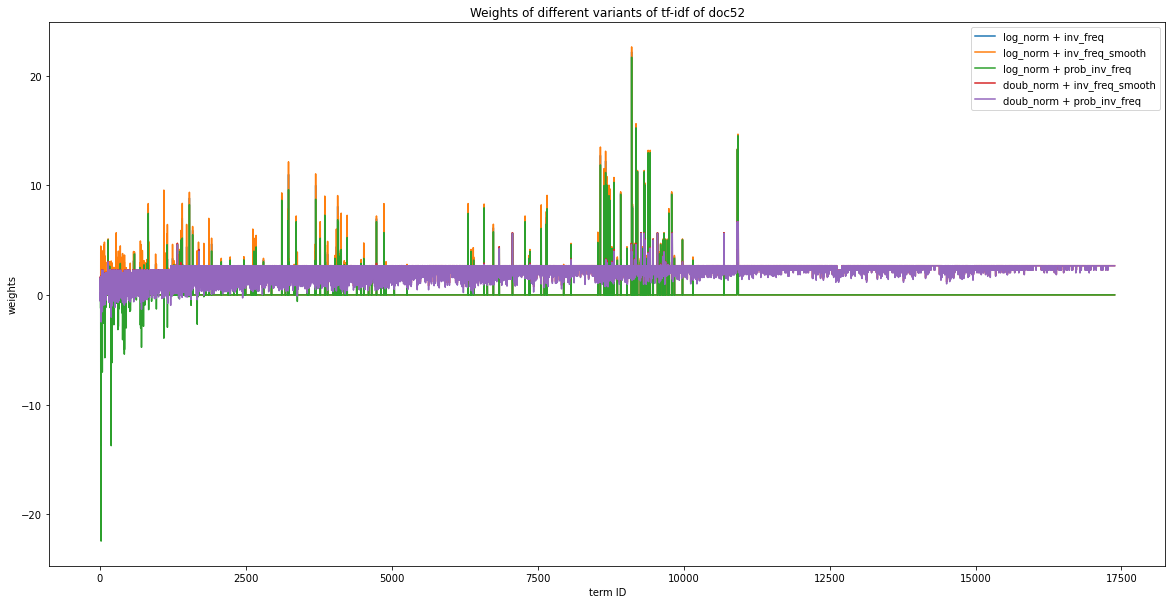

In [34]:
plt.figure(figsize=(20,10))
plt.plot(VSM.index,VSM['doc52'],label='log_norm + inv_freq')
plt.plot(VSM_ln_ifs.index,VSM_ln_ifs['doc52'],label='log_norm + inv_freq_smooth')
plt.plot(VSM_ln_pif.index,VSM_ln_pif['doc52'],label='log_norm + prob_inv_freq')
plt.plot(VSM_dn_ifs.index,VSM_dn_ifs['doc52'],label='doub_norm + inv_freq_smooth')
plt.plot(VSM_dn_pif.index,VSM_dn_pif['doc52'],label='doub_norm + prob_inv_freq')
plt.xlabel('term ID')
plt.ylabel('weights')
plt.title('Weights of different variants of tf-idf of doc52')
plt.legend()
plt.show()

### Closeness measure used is Cosine Similarity<br> 
#### Cos - Sim(q,$d_i$) = cos($\alpha$) = $\frac{\sum_{j=1}^t}{\sqrt{\sum_{j=1}^t(w_{ij})^2\sum_{j=1}^t(w_{qj})^2}}$

In [35]:
def Cosine(query_unique,docw,qw):
    summation=0
    for i in range(len(query_unique)):
        summation+=(qw[i]*docw[voc[query_unique[i]]])
    if summation==0:
        return 0
#     print(summation)
    temp1=0
    temp2=0
    for i in range(len(query_unique)):
        temp1+=(qw[i]**2)
        temp2+=(docw[voc[query_unique[i]]]**2)
    res=summation/math.sqrt(temp1*temp2)
    return res

### Creating rank list of documents with respect to query

In [36]:
def query_tfidf(query,query_unique):
    q_fij=[]
    for i in query_unique:
        q_fij.append(np.count_nonzero(query==i))
    q_tf_ln=[]
    q_tf_dn=[]
    for i in q_fij:
        q_tf_ln.append(1+math.log2(i))
        q_tf_dn.append(0.4+(0.6*(i)))
    q_idf=[]
    q_idf_ifs=[]
    q_idf_pif=[]
    for i in range(len(query_unique)):
        q_idf.append(math.log2(N/ni[voc[query_unique[i]]]))
        q_idf_ifs.append(math.log2(1+(N/ni[voc[query_unique[i]]])))
        if(N-ni[voc[query_unique[i]]]==0):
            q_idf_pif.append(0)
        else:
            q_idf_pif.append(math.log2((N-ni[voc[query_unique[i]]])/ni[voc[query_unique[i]]]))
    q_ln_if=[]
    q_ln_ifs=[]
    q_ln_pif=[]
    q_dn_ifs=[]
    q_dn_pif=[]
    for i in range(len(query_unique)):
        q_ln_if.append(q_tf_ln[i]*q_idf[i])
        q_ln_ifs.append(q_tf_ln[i]*q_idf_ifs[i])
        q_ln_pif.append(q_tf_ln[i]*q_idf_pif[i])
        q_dn_ifs.append(q_tf_dn[i]*q_idf_ifs[i])
        q_dn_pif.append(q_tf_dn[i]*q_idf_pif[i])
    return (q_ln_if,q_ln_ifs,q_ln_pif,q_dn_ifs,q_dn_pif)
    

In [49]:
def Rank_list(query):
    porter=PorterStemmer()
#  
    query=word_tokenize(query)
    query=[word.replace('.','') for word in query]
    query=[word.replace('-','') for word in query]
    query=[word for word in query if word.isalpha()]
    query=[word.lower() for word in query]
    query=[word for word in query if not word in stopwords.words("english")]
    query=[porter.stem(word) for word in query]
    query=np.array(query)
    print('Precrossed query is:',query)
    query_unique=[]
    for i in query:
        if i not in query_unique:
            query_unique.append(i)
            
    q_ln_if,q_ln_ifs,q_ln_pif,q_dn_ifs,q_dn_pif=query_tfidf(query,query_unique)
    rank=[] 
    rank_ln_ifs=[] 
    rank_ln_pif=[]
    rank_dn_ifs=[]
    rank_dn_pif=[]
    for i in range(N):
#         print(i)
        rank.append([Cosine(query_unique,doc[i],q_ln_if),i])
        rank_ln_ifs.append([Cosine(query_unique,doc_ln_ifs[i],q_ln_ifs),i])
        rank_ln_pif.append([Cosine(query_unique,doc_ln_pif[i],q_ln_pif),i])
        rank_dn_ifs.append([Cosine(query_unique,doc_dn_ifs[i],q_dn_ifs),i])
        rank_dn_pif.append([Cosine(query_unique,doc_dn_pif[i],q_dn_pif),i])
    rank.sort(reverse=True)
    rank_ln_ifs.sort(reverse=True)
    rank_ln_pif.sort(reverse=True)
    rank_dn_ifs.sort(reverse=True)
    rank_dn_pif.sort(reverse=True)
    return (rank[:50],rank_ln_ifs[:50],rank_ln_pif[:50],rank_dn_ifs[:50],rank_dn_pif[:50])
    

In [50]:
def Search(query):
#     print(query)
    rank_ln_if,rank_ln_ifs,rank_ln_pif,rank_dn_ifs,rank_dn_pif=Rank_list(query)
    print('Showing top 50 results')
    rank_ln_if_r=[]
    rank_ln_ifs_r=[]
    rank_ln_pif_r=[]
    rank_dn_ifs_r=[]
    rank_dn_pif_r=[]
    for i in range(len(rank_ln_if)):
        rank_ln_if_r.append('doc'+str(rank_ln_if[i][1])+'('+str(round(rank_ln_if[i][0],4))+')')
        rank_ln_ifs_r.append('doc'+str(rank_ln_ifs[i][1])+'('+str(round(rank_ln_ifs[i][0],4))+')')
        rank_ln_pif_r.append('doc'+str(rank_ln_pif[i][1])+'('+str(round(rank_ln_pif[i][0],4))+')')
        rank_dn_ifs_r.append('doc'+str(rank_dn_ifs[i][1])+'('+str(round(rank_dn_ifs[i][0],4))+')')
        rank_dn_pif_r.append('doc'+str(rank_dn_pif[i][1])+'('+str(round(rank_dn_pif[i][0],4))+')')
    result=pd.DataFrame({'log_norm+inv_feq':rank_ln_if_r,'log_norm+inv_freq_smooth':rank_ln_ifs_r,'log_norm+prob_inv_freq':rank_ln_pif_r,'doub_norm+inv_freq_smooth':rank_dn_ifs_r,'doub_norm+prob_inv_freq':rank_dn_pif_r})
    return result
    

In [56]:
Search('Software for Medical')

Precrossed query is: ['softwar' 'medic']
Showing top 50 results


,log_norm+inv_feq,log_norm+inv_freq_smooth,log_norm+prob_inv_freq,doub_norm+inv_freq_smooth,doub_norm+prob_inv_freq
0,doc68(1.0),doc68(1.0),doc68(1.0),doc98(1.0),doc98(1.0)
1,doc95(0.991),doc95(0.9843),doc95(0.9935),doc89(1.0),doc89(1.0)
2,doc71(0.9884),doc71(0.9839),doc71(0.9909),doc72(1.0),doc72(1.0)
3,doc29(0.9858),doc29(0.9746),doc29(0.9897),doc66(1.0),doc66(1.0)
4,doc65(0.9805),doc65(0.9645),doc65(0.986),doc63(1.0),doc63(1.0)
5,doc39(0.9746),doc39(0.953),doc39(0.9819),doc62(1.0),doc62(1.0)
6,doc30(0.9583),doc90(0.9467),doc30(0.9705),doc61(1.0),doc61(1.0)
7,doc90(0.9567),doc30(0.9201),doc90(0.9645),doc60(1.0),doc60(1.0)
8,doc36(0.9388),doc36(0.8796),doc36(0.9569),doc59(1.0),doc59(1.0)
9,doc33(0.9153),doc93(0.867),doc38(0.9407),doc58(1.0),doc58(1.0)


In [60]:
Search('Python language for programming')

Precrossed query is: ['python' 'languag' 'program']
Showing top 50 results


,log_norm+inv_feq,log_norm+inv_freq_smooth,log_norm+prob_inv_freq,doub_norm+inv_freq_smooth,doub_norm+prob_inv_freq
0,doc13(0.9948),doc13(0.9929),doc13(0.9903),doc73(1.0),doc73(1.0)
1,doc0(0.9948),doc0(0.9929),doc0(0.9903),doc69(1.0),doc69(1.0)
2,doc21(0.9907),doc21(0.9859),doc21(0.9788),doc66(1.0),doc66(1.0)
3,doc9(0.9666),doc1(0.9572),doc17(0.9738),doc63(1.0),doc63(1.0)
4,doc15(0.9656),doc15(0.9493),doc20(0.9674),doc62(1.0),doc62(1.0)
5,doc1(0.9649),doc3(0.9407),doc1(0.9636),doc61(1.0),doc61(1.0)
6,doc24(0.9534),doc24(0.939),doc23(0.9607),doc60(1.0),doc60(1.0)
7,doc64(0.9503),doc9(0.9249),doc11(0.9437),doc58(1.0),doc58(1.0)
8,doc3(0.9433),doc23(0.9136),doc24(0.9404),doc57(1.0),doc57(1.0)
9,doc10(0.9274),doc17(0.9134),doc15(0.9337),doc54(1.0),doc54(1.0)


In [59]:
Search('Game engine with graphics using Python')

Precrossed query is: ['game' 'engin' 'graphic' 'use' 'python']
Showing top 50 results


,log_norm+inv_feq,log_norm+inv_freq_smooth,log_norm+prob_inv_freq,doub_norm+inv_freq_smooth,doub_norm+prob_inv_freq
0,doc93(0.8717),doc46(0.8775),doc46(0.9783),doc36(1.0),doc36(1.0)
1,doc46(0.8586),doc93(0.8694),doc93(0.9765),doc69(1.0),doc45(1.0)
2,doc13(0.838),doc99(0.8463),doc13(0.9763),doc45(1.0),doc69(1.0)
3,doc0(0.838),doc13(0.8403),doc0(0.9763),doc26(1.0),doc23(1.0)
4,doc85(0.822),doc0(0.8403),doc99(0.9743),doc5(1.0),doc6(1.0)
5,doc99(0.8209),doc79(0.8278),doc79(0.9698),doc6(1.0),doc22(1.0)
6,doc75(0.8171),doc86(0.8266),doc48(0.9693),doc66(1.0),doc5(1.0)
7,doc94(0.8156),doc75(0.815),doc86(0.9689),doc25(1.0),doc63(1.0)
8,doc79(0.8153),doc97(0.8137),doc98(0.9683),doc63(1.0),doc62(1.0)
9,doc97(0.811),doc94(0.8135),doc20(0.9662),doc62(1.0),doc26(1.0)
